In [8]:
# ライブラリのインポート

from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import datasets
from sklearn.base import BaseEstimator, ClassifierMixin

Data
<class 'numpy.ndarray'>
(1797, 64)
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
Classes  [0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>
[0 1 2 ..., 8 9 8]
Sample Data
4


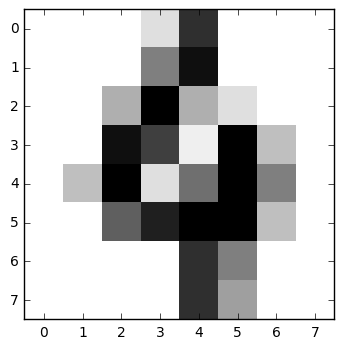

0


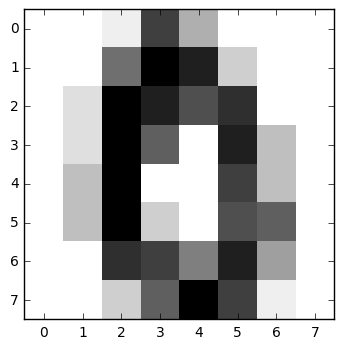

In [15]:
# Load data
digits = datasets.load_digits()

# データを見てみる
#print(iris)
print("Data")
print(digits.data.__class__)
print(digits.data.shape)
print(digits.data)
print("Classes ", digits.target_names)
print(digits.target.__class__)
print(digits.target)

print("Sample Data")
print(digits.target[100])
plt.imshow(digits.data[100].reshape(8, 8), cmap=cm.gray_r, interpolation='nearest')
plt.show()

print(digits.target[101])
plt.imshow(digits.data[101].reshape(8, 8), cmap=cm.gray_r, interpolation='nearest')
plt.show()

X = digits.data
y = digits.target

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

clf = KNeighborsClassifier(n_neighbors=4)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

svm = SVC(kernel='rbf', probability=True)
scores = cross_val_score(svm, X, y, cv=5)
print(scores)

[ 0.9478022   0.95856354  0.96657382  0.98039216  0.96619718]
[ 0.89285714  0.83977901  0.87465181  0.92436975  0.84788732]
[ 0.43406593  0.40883978  0.41504178  0.48739496  0.49859155]


In [58]:
from sklearn.base import BaseEstimator
from collections import Counter

class MyNeaestNeiborClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, neighbor_size=4):
        self.neighbor_size = neighbor_size
    
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        return self

    def predict(self, newX):
        distance_and_label = [[self._distance(x, newX), self.Y[index]] for index, x in enumerate(self.X)]
        distance_and_label = sorted(distance_and_label, key=lambda d: d[0])[0:self.neighbor_size]
        labels = [d[1] for d in distance_and_label]
        counter = Counter(labels)
        estimate = counter.most_common()
        return estimate[0][0]
    
    def _distance(self, x1, x2):
        return np.linalg.norm(x1 - x2)
    
    def score(self, x, y):
        return 0

    def get_params(self, deep=True):
        return {'param1': self.param1, 'param2': self.param2}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter, value)
        return self
    
clf = MyNeaestNeiborClassifier()
clf.fit(digits.data, digits.target)
print(clf.predict(digits.data[100]))
print(clf.predict(digits.data[101]))

4
0
